## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df = mouse_metadata_df.merge(study_results_df, how = "outer", on = "Mouse ID")
# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
data_df["Mouse ID"].count()

1893

In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
duplicate_mice = data_df[data_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Drop any duplicate rows
new_df = data_df[~data_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
new_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Recheck the number of mice
new_df["Mouse ID"].nunique()

249

In [6]:
drug_group = new_df.groupby("Drug Regimen")
drug_group

In [7]:
data_mean = drug_group['Tumor Volume (mm3)'].mean()
data_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.458254
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
data_med = drug_group['Tumor Volume (mm3)'].median()
data_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
data_var = drug_group['Tumor Volume (mm3)'].var()
data_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     44.053659
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [10]:
data_std = drug_group['Tumor Volume (mm3)'].std()
data_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.637293
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [11]:
data_sem = drug_group['Tumor Volume (mm3)'].sem()
data_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.540135
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
summarydf = pd.DataFrame({"Mean": data_mean,"Median": data_med, "Variance": data_var,
                              "Standard Deviation": data_std, "SEM": data_sem})
summarydf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<AxesSubplot:>

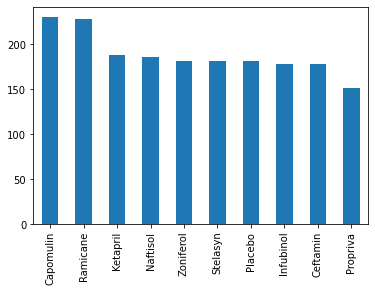

In [13]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

plot = new_df['Drug Regimen'].value_counts().plot.bar()
plot

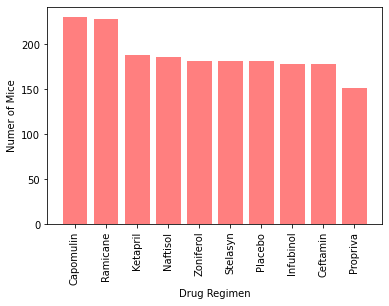

In [14]:
# Generate identical bar plot using pyplot instead of pandas.

y_axis = new_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(y_axis))
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Numer of Mice')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, y_axis.index.values)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Sex'>

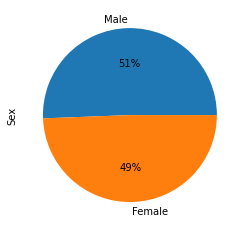

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie = round(data_df['Sex'].value_counts())
pie.plot.pie(autopct='%1.f%%')

([<matplotlib.patches.Wedge at 0x1daab2eb100>,
 [Text(-0.02099250347258543, 1.0997996703027118, '958'),
  Text(0.020992503472585782, -1.0997996703027118, '935')],
 [Text(-0.01145045643959205, 0.5998907292560246, '51%'),
  Text(0.011450456439592244, -0.5998907292560246, '49%')])

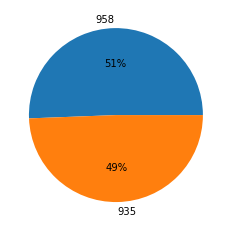

In [16]:
# Generate identical pie plot using pyplot
labels = pie
plt.pie(pie, labels = labels, autopct = '%1.f%%')

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [18]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

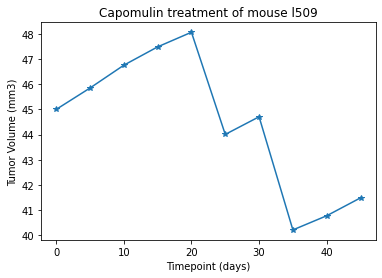

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 'l509']
mouse
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '*')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

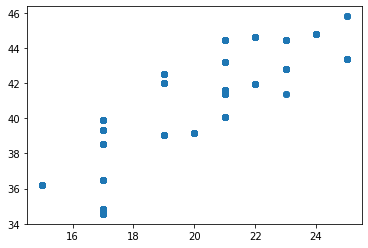

In [66]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
capo = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avg_tumor = pd.DataFrame(capo.groupby("Mouse ID")['Tumor Volume (mm3)'].mean())
capo_df = pd.merge(capo, avg_tumor, on ="Mouse ID")
final_capo_df = capo_df[['Weight (g)', 'Tumor Volume (mm3)_x', 'Tumor Volume (mm3)_y']].drop_duplicates()

x = final_capo_df['Weight (g)']
y = final_capo_df['Tumor Volume (mm3)_y']
plt.scatter(x,y)

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights